# Demand prediction updated solution. Polyakov Daniil (494).

Victor Kantor, xead.wl@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train = pd.read_csv("train.tsv")
test = pd.read_csv("test.tsv")
sample_submission = pd.read_csv("sample_submission.tsv")

In [2]:
train

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0,123438,2012,52,1,20442076,4915.0,38056.0,40185.0,45733.0,...,39423.0,41765.0,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0
1,1,58410,2012,52,1,20441997,2230.0,18817.0,20110.0,26368.0,...,22830.0,25230.0,27850.0,21390.0,27090.0,23170.0,29705.0,19140.0,22055.0,23200.0
2,2,163930,2012,52,1,20441990,5695.0,47480.0,47619.0,89708.0,...,14930.0,44290.0,46412.0,29320.0,21140.0,28406.0,65056.0,31886.0,48750.0,36520.0
3,3,53902,2012,52,1,20441989,1995.0,17146.0,20066.0,27070.0,...,15120.0,12480.0,19780.0,7990.0,8230.0,10650.0,21920.0,13040.0,9780.0,9630.0
4,4,105970,2012,52,1,20441988,6515.0,49262.0,50045.0,95167.0,...,18872.0,19328.0,37168.0,13570.0,19760.0,20208.0,34745.0,18442.0,24700.0,21793.0
5,5,21171,2012,52,1,20441953,445.0,3020.0,2395.0,4015.0,...,8796.0,7690.0,13448.0,3455.0,7205.0,8490.0,10790.0,7855.0,8150.0,7505.0
6,6,63128,2012,52,1,20441952,445.0,3930.0,4260.0,6836.0,...,11754.0,8064.0,15275.0,4991.0,9025.0,12236.0,19830.0,8465.0,10770.0,13145.0
7,7,44001,2012,52,1,20441951,1167.0,15220.0,12310.0,17270.0,...,21102.0,20376.0,25385.0,11685.0,21389.0,16685.0,22805.0,14495.0,16462.0,19383.0
8,8,53202,2012,52,1,20441790,1640.0,22010.0,17716.0,21941.0,...,18301.0,17758.0,26181.0,11090.0,17705.0,17225.0,23385.0,13711.0,17175.0,22406.0
9,9,36627,2012,52,1,20441789,1440.0,14601.0,12127.0,17498.0,...,13531.0,15015.0,18574.0,9146.0,14865.0,13051.0,17389.0,10739.0,13260.0,15570.0


Подумаем, как преобрадовать item_id в более осознанный категориальный празнак. Для этого посмотрим на частоту появления каждого item_id.

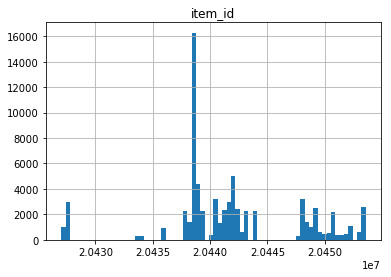

In [3]:
plt.show(pd.DataFrame.hist(train, column = 'item_id', bins = 70))

Видно, что некоторые item_id встречаются много раз, а некоторые ни разу. Главное, что теперь товары можно разбить на несколько непересекающихся групп (возможно в группе находятся товары из одной категории, напр. "Овощи").

Из гистограммы можно увидеть, что товары можно разбить на 13 групп. Присвоим товарам из кластеров номера от 1 до 13.

In [4]:
ranges = [20427028.0, 20433131.0, 20433662.0, 20435785.0, 20437642.0, 20440030.0,
          20442684.0, 20443745.0, 20447725.0, 20451440.0, 20451971.0, 20452767.0]

def cluster_id(id):
    l = len(ranges)
    b_num = 0
    for i in range(l):
        if id > ranges[i]:
            b_num = i+1

    return b_num

train.item_id = map(cluster_id, list(train.item_id))
test.item_id = map(cluster_id, list(test.item_id))

Далее построим срезы продаж для одгного случайно выбранного товара.

In [5]:
a=train.iloc[4]
a = np.array(a)
a

array([  4.00000000e+00,   1.05970000e+05,   2.01200000e+03,
         5.20000000e+01,   1.00000000e+00,   6.00000000e+00,
         6.51500000e+03,   4.92620000e+04,   5.00450000e+04,
         9.51670000e+04,   1.02390000e+05,   2.38020000e+04,
         4.43830000e+04,   3.78150000e+04,   2.90550000e+04,
         4.02600000e+04,   1.74900000e+04,   1.26310000e+04,
         2.07300000e+04,   4.72100000e+04,   2.02440000e+04,
         3.00210000e+04,   3.52010000e+04,   6.07600000e+04,
         3.27260000e+04,   1.84600000e+04,   1.88720000e+04,
         1.93280000e+04,   3.71680000e+04,   1.35700000e+04,
         1.97600000e+04,   2.02080000e+04,   3.47450000e+04,
         1.84420000e+04,   2.47000000e+04,   2.17930000e+04,
         6.51500000e+03,   4.92620000e+04,   5.00450000e+04,
         9.51670000e+04,   1.02390000e+05,   2.38020000e+04,
         4.43830000e+04,   3.78150000e+04,   2.90550000e+04,
         4.02600000e+04,   1.74900000e+04,   1.26310000e+04,
         2.07300000e+04,

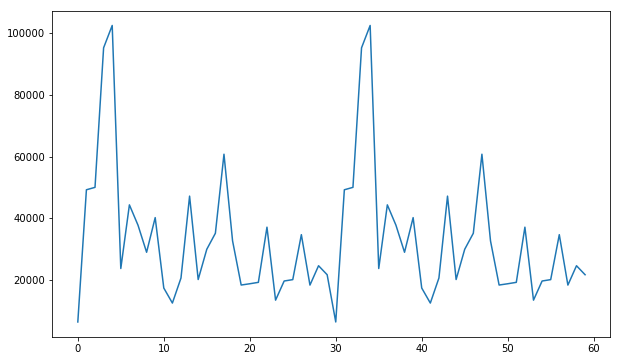

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(a[6:])

Видим, что признаки 'f31-f60' являются повторением признаков 'f1-f30'. Поэтому реальных данных в два раза меньше. В связи с этим я убрал признаки 'f31-f60' у объектов из обучающей выборки.

In [7]:
X = train.drop(['Num','y', 'f31', 'f32','f33', 'f34', 'f35', 'f36','f37', 'f38', 'f39', 'f40','f41', 'f42', 'f43', 'f44','f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52','f53', 'f54', 'f55', 'f56','f57', 'f58', 'f59', 'f60'], axis=1)
y = train['y']

Дальше прологарифмируем признаки (избегая при этом нулей). Это будет своего рода нормализация данных.

In [8]:
columns=[(lambda i: "f{0}".format(i))(i) for i in range(1, 61)] + ['y']

In [9]:
stat = train[columns]
stat[stat == 0] = 1e-7
train[columns] = np.log(stat)

C:\Users\Daniil\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Daniil\Anaconda2\lib\site-packages\pandas\core\frame.py:2454: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [10]:
columns=[(lambda i: "f{0}".format(i))(i) for i in range(1, 61)]

In [11]:
stat = test[columns]
stat[stat == 0] = 1e-7
test[columns] = np.log(stat)

C:\Users\Daniil\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
def smape(y_true, y_pred):  
    return 2 * np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + np.abs(Y_pred) + 1e-8))) * 100

Дальше просто запускаем градиентный бустинг.

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=50, max_depth=12, random_state=42, verbose=True)
model.fit(X, y)

Алгоритм обучается около 20 минут, лучше его не запускать.
Ошибка на train стала 0,02. 

In [18]:
preds = np.exp(model.predict(test.drop(['Num', 'f31', 'f32','f33', 'f34', 'f35', 'f36','f37', 'f38', 'f39', 'f40','f41', 'f42', 'f43', 'f44','f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52','f53', 'f54', 'f55', 'f56','f57', 'f58', 'f59', 'f60'], axis=1)))

print len(preds)
print len(sample_submission)

2016
2016


C:\Users\Daniil\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


In [ ]:
X = train.drop(['Num','y', 'f31', 'f32','f33', 'f34', 'f35', 'f36','f37', 'f38', 'f39', 'f40','f41', 'f42', 'f43', 'f44','f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52','f53', 'f54', 'f55', 'f56','f57', 'f58', 'f59', 'f60'], axis=1)
y = train['y']

In [21]:
print(model.score(X, y))

0.999454955299


Видимо, модель переобучена, раз качество уменьшилось.

In [22]:
sample_submission['y'] = preds

In [23]:
sample_submission['y'] = sample_submission['y'].map(lambda x: x if x > 0 else 0.0)

In [ ]:
sample_submission.to_csv("tuned_baseline.tsv", sep=',', index=False)